# Exploratory Data Analysis

In [77]:
import pandas as pd
import pyarrow
import os
import matplotlib.pyplot as plt
folder_path = os.getenv("MY_WORKSPACE", 'empty') + '/acl_spring_24_bulls2'
os.chdir(folder_path)



## Import and Merge Data

In [78]:
# Read the parquet files
tickets = pd.read_parquet('data/processed/season_tickets.parquet')
games = pd.read_parquet('data/processed/home_games.parquet')
email_sends = pd.read_parquet('data/processed/season_email_send.parquet')
email_ctrs = pd.read_parquet('data/processed/season_email_ctr.parquet')
liva = pd.read_parquet('data/processed/liv_a.parquet')
promos = pd.read_parquet('data/processed/promos.parquet')

In [6]:
len(tickets)

236956

In [2]:
tickets_liva = pd.read_csv("data/processed/tickets_games_liva.csv")

/var/folders/3q/d621fwvs43q2f6s93g46njd00000gn/T/ipykernel_50379/377198049.py:1: DtypeWarning: Columns (243,252,253,255) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_liva = pd.read_csv("data/processed/tickets_games_liva.csv")


In [3]:
tickets_liva.describe()

,year,days_before_event,total_seats,age_two_yr_incr_input_indv,age_two_yr_incr_1st_indv,age_two_yr_incr_2nd_indv,adult_hh_num,len_of_resdnc_cd,income_est_hh_cd,est_hh_inc_higher_ranges_cd,...,client_tkt_price,client_tkt_price_max,client_tkt_price_min,G,pts,pts_all,W,L,Streak_1,streak_normal
count,236956.000000,236956.000000,236956.000000,164095.000000,167251.000000,83708.000000,174682.000000,144447.000000,164129.000000,124207.000000,...,83608.000000,83608.000000,83608.000000,223620.000000,223620.000000,223620.000000,223620.000000,223620.000000,223620.000000,223620.00000
mean,2022.879340,257.833982,1.966779,44.420013,46.840689,51.106609,1.965835,9.773038,6.877158,15.205737,...,155.812175,206.476766,120.381895,37.747706,112.902008,111.889634,17.083146,20.664560,1.712503,-0.06876
std,0.643402,101.386603,0.866810,14.343027,13.786286,15.356859,0.964605,5.439854,2.188415,2.389228,...,180.146209,281.124270,162.196528,22.560896,12.469091,12.257465,10.990716,11.641048,0.957284,1.96070
min,2022.000000,-61.000000,1.000000,18.000000,18.000000,18.000000,1.000000,0.000000,1.000000,10.000000,...,5.000000,5.000000,4.250000,1.000000,91.000000,81.000000,0.000000,1.000000,1.000000,-6.00000
25%,2022.000000,178.000000,1.000000,32.000000,36.000000,40.000000,1.000000,5.000000,6.000000,14.000000,...,69.500000,80.000000,46.000000,16.000000,104.000000,103.000000,6.000000,10.000000,1.000000,-1.00000
50%,2023.000000,269.000000,2.000000,42.000000,46.000000,50.000000,2.000000,11.000000,7.000000,15.000000,...,112.340000,141.000000,80.000000,36.000000,111.000000,113.000000,16.000000,20.000000,1.000000,1.00000
75%,2023.000000,337.000000,2.000000,54.000000,56.000000,62.000000,2.000000,15.000000,9.000000,17.000000,...,182.500000,240.000000,145.000000,58.000000,122.000000,121.000000,26.000000,31.000000,2.000000,1.00000
max,2024.000000,436.000000,9.000000,99.000000,99.000000,99.000000,6.000000,15.000000,9.000000,19.000000,...,7500.000000,7500.000000,7500.000000,82.000000,144.000000,140.000000,40.000000,42.000000,6.000000,3.00000


In [4]:
len(tickets_liva)

236956

In [11]:
#og flag
tickets_liva['ticketholder_attends'] = tickets_liva['purchaser_email'] == tickets_liva['attendee_email']


In [7]:
tickets_liva.attendee_email.value_counts()

attendee_email
michaelsblechman@gmail.com      279
simoneisenfeld@gmail.com        215
avrahamkarsh@gmail.com          200
jenspecial1@gmail.com           173
cshulman23@gmail.com            170
                               ... 
kellybriceno_8@yahoo.com          1
van.wills@stantec.com             1
slatham2@wi.rr.com                1
aritza.p.21@gmail.com             1
christine.2.nguyen@gmail.com      1
Name: count, Length: 116211, dtype: int64

In [15]:
sum(tickets_liva['ticketholder_attends'])/len(tickets_liva['ticketholder_attends'])



0.267551781765391

In [16]:
xx = tickets_liva.groupby(["event_date", "purchaser_email", "attendee_email"]).mean("ticketholder_attends").reset_index()
sum(xx['ticketholder_attends'])/len(xx['ticketholder_attends'])

0.2439707352026097

In [35]:
#Plotting Function
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(data, title, xlabel, ylabel, bins, xlim):
    to_plot = data

    # Set a theme using seaborn
    sns.set_theme()

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create a histogram of the 'counts' column with custom settings
    ax.hist(to_plot['count'], bins=bins, color='#0504aa', alpha=0.7, rwidth=0.85)

    # Add grid
    ax.grid(axis='y', alpha=0.75)

    # Add a title and labels
    ax.set_title(title, fontsize=15)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

    # Set the fontsize of the tick labels
    ax.tick_params(axis='both', labelsize=12)

    # Limit the x-axis from 0 to 60
    ax.set_xlim(xlim)

    # Show the histogram
    plt.show()

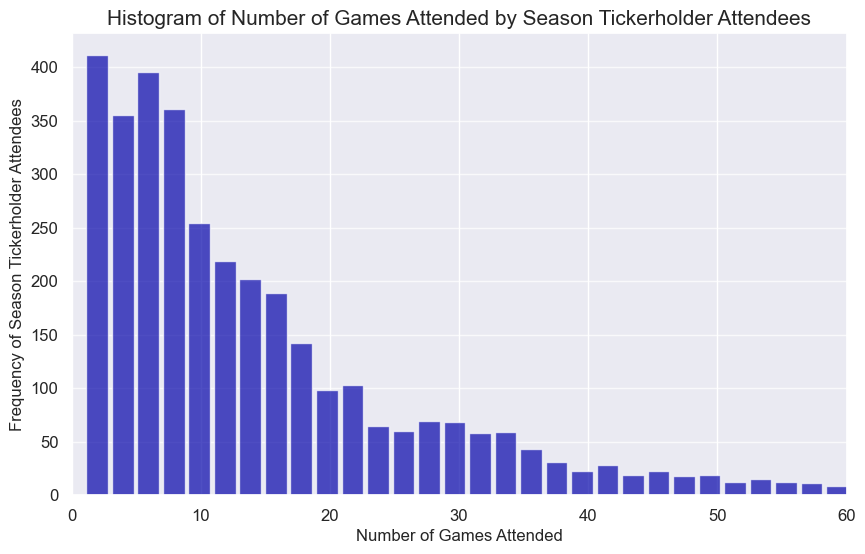

In [36]:
ogs = tickets_liva[tickets_liva['ticketholder_attends']==True]
ogs_seats = ogs.groupby(['attendee_email', 'event_date']).agg({"total_seats":"sum"}).reset_index()
ogs_games_attended = ogs_seats['attendee_email'].value_counts().reset_index()

title = "Histogram of Number of Games Attended by Season Tickerholder Attendees"
xlabel = "Number of Games Attended"
ylabel = "Frequency of Season Tickerholder Attendees"
plot_histogram(ogs_games_attended, title, xlabel, ylabel, bins='auto', xlim=[0, 60])


In [29]:
ogs_deduped = ogs.groupby(['attendee_email'])["attendee_zip_code"].first().reset_index()

In [33]:
ogs_deduped.to_parquet("/Users/jm/working/acl_spring_24_bulls2/for_jay_ogs.parquet", index = False)

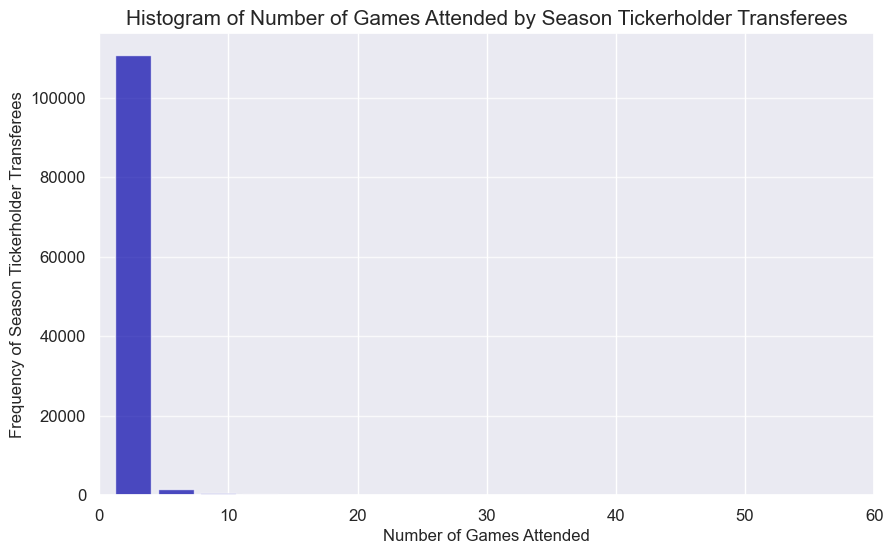

In [37]:
transfers = tickets_liva[tickets_liva['ticketholder_attends']==False]
transfers_seats = transfers.groupby(['attendee_email', 'event_date']).agg({"total_seats":"sum"}).reset_index()
transfers_games_attended = transfers_seats['attendee_email'].value_counts().reset_index()

title = "Histogram of Number of Games Attended by Season Tickerholder Transferees"
xlabel = "Number of Games Attended"
ylabel = "Frequency of Season Tickerholder Transferees"
plot_histogram(transfers_games_attended, title, xlabel, ylabel, bins='auto', xlim=[0, 60])

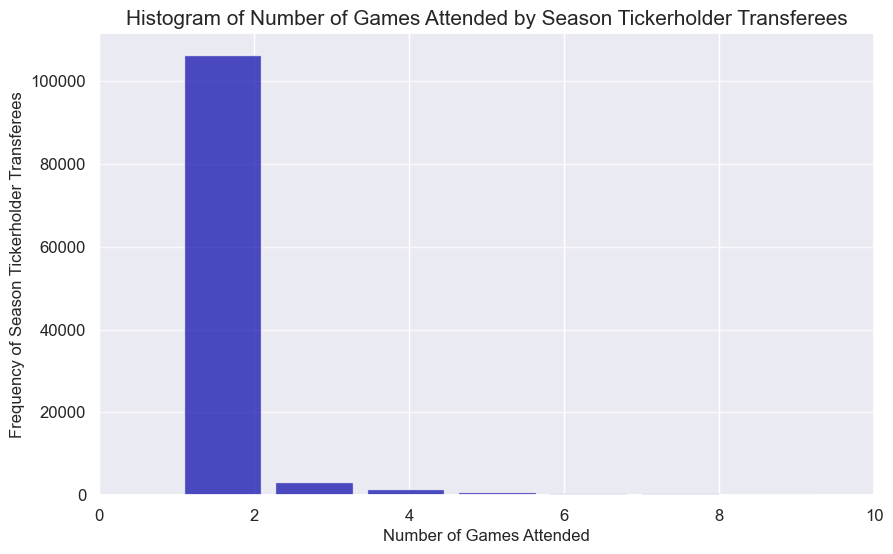

In [39]:
plot_histogram(transfers_games_attended, title, xlabel, ylabel, bins=50, xlim=[0, 10])

In [40]:
#Let's look at the household charactersitics now
hh_columns = ['hh_male_18_24_ind', 'hh_female_18_24_ind', 'hh_unk_18_24_ind', 'hh_male_25_34_ind', 'hh_female_25_34_ind', 'hh_unk_25_34_ind', 'hh_male_35_44_ind', 'hh_female_35_44_ind', 'hh_unk_35_44_ind', 'hh_male_45_54_ind', 'hh_female_45_54_ind', 'hh_unk_45_54_ind', 'hh_male_55_64_ind', 'hh_female_55_64_ind', 'hh_unk_55_64_ind', 'hh_male_65_74_ind', 'hh_female_65_74_ind', 'hh_unk_65_74_ind', 'hh_male_75_plus_ind', 'hh_female_75_plus_ind', 'hh_unk_75_plus_ind', 'hh_male_00_02_ind', 'hh_female_00_02_ind', 'hh_unk_00_02_ind', 'hh_male_03_05_ind', 'hh_female_03_05_ind', 'hh_unk_03_05_ind', 'hh_male_06_10_ind', 'hh_female_06_10_ind', 'hh_unk_06_10_ind', 'hh_male_11_15_ind', 'hh_female_11_15_ind', 'hh_unk_11_15_ind', 'hh_male_16_17_ind', 'hh_female_16_17_ind']

tickets_liva['hh_size'] = tickets_liva[hh_columns].sum(axis=1)


In [55]:
ogs_demos = tickets_liva[tickets_liva['ticketholder_attends']==True].groupby(['attendee_email', 'event_date']).agg({"hh_size":"first", "total_seats":"sum"}).reset_index()

In [56]:
ogs_demos_grouped = ogs_demos.groupby(['attendee_email']).agg({"hh_size":"first", "total_seats":"mean"}).reset_index()

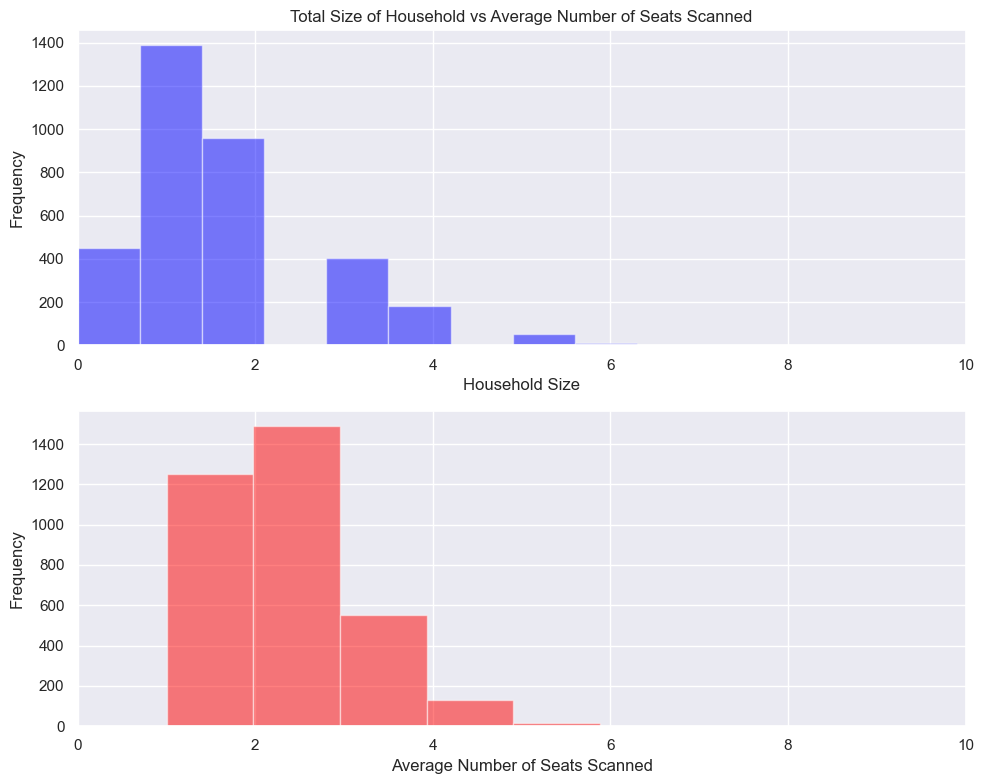

In [58]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the first histogram on the first subplot
ax1.hist(ogs_demos_grouped['hh_size'], bins=10, color='blue', alpha=0.5)
ax1.set_title('Total Size of Household vs Average Number of Seats Scanned')
ax1.set_xlabel('Household Size')
ax1.set_ylabel('Frequency')
ax1.set_xlim([0, 10])

# Plot the second histogram on the second subplot
ax2.hist(ogs_demos_grouped['total_seats'], bins=10, color='red', alpha=0.5)
#ax2.set_title('Average Number of Seats Scanned')
ax2.set_xlabel('Average Number of Seats Scanned')
ax2.set_ylabel('Frequency')

ax2.set_xlim([0, 10])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


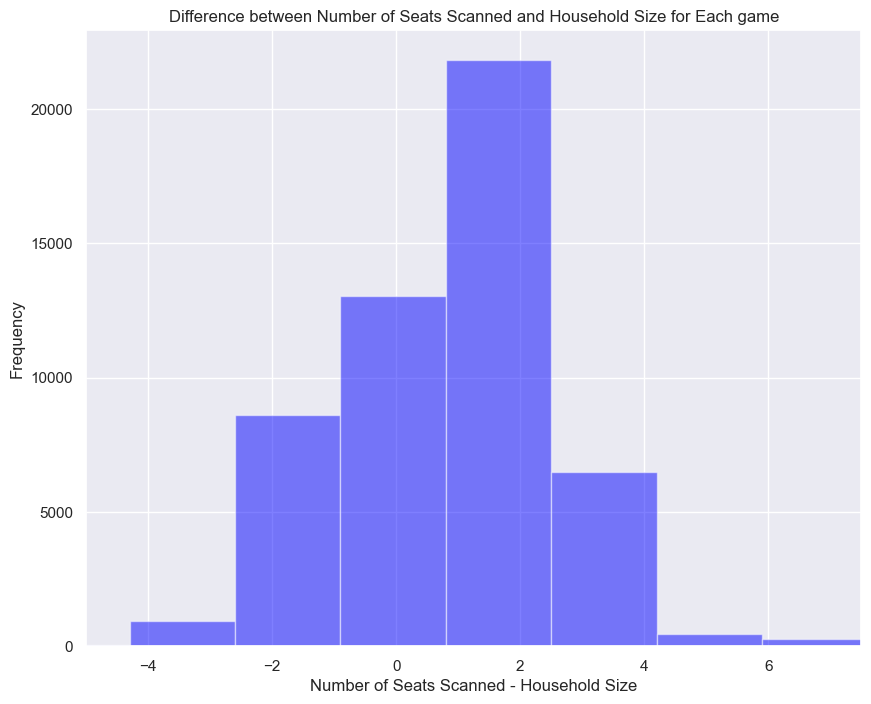

In [68]:
ogs_demos['diff'] = ogs_demos['total_seats'] - ogs_demos['hh_size']
has_negative_values = any(ogs_demos['diff'] < 0)


# Create a figure with two subplots
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))

# Plot the first histogram on the first subplot
ax1.hist(ogs_demos['diff'], bins=10, color='blue', alpha=0.5)
ax1.set_title('Difference between Number of Seats Scanned and Household Size for Each game')
ax1.set_xlabel('Number of Seats Scanned - Household Size')
ax1.set_ylabel('Frequency')
ax1.set_xlim([-5,7.5])


plt.show()


In [70]:
ogs_demos['diff'].mean()

0.7880357073849364

## Email Sends and Email Clickthroughs Analysis

In [79]:
email_sends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222142 entries, 0 to 222141
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   email_send_dt         222142 non-null  datetime64[ns]
 1   email_group           222142 non-null  object        
 2   email_name            222142 non-null  object        
 3   attendee_email        222142 non-null  object        
 4   total_sends           222142 non-null  float64       
 5   total_delivered       222142 non-null  float64       
 6   total_opens           29558 non-null   float64       
 7   unique_opens          222142 non-null  int64         
 8   total_clickthroughs   5524 non-null    float64       
 9   unique_clickthroughs  222142 non-null  int64         
 10  season                222142 non-null  int64         
 11  email_type            222142 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memo

In [80]:
email_ctrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8158 entries, 0 to 8157
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   attendee_email           8158 non-null   object        
 1   clickthrough_url         8158 non-null   object        
 2   clickthrough_dt          8158 non-null   datetime64[ns]
 3   email_name               8158 non-null   object        
 4   total_clickthroughs      8158 non-null   int64         
 5   email_send_dt            8158 non-null   datetime64[ns]
 6   unique_clickthroughs     8158 non-null   int64         
 7   clickthrough_link_count  8158 non-null   int64         
 8   season                   8158 non-null   int64         
 9   email_type               8158 non-null   object        
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 637.5+ KB


In [75]:
email_sends.describe(include='all')

,email_send_dt,email_group,email_name,attendee_email,total_sends,total_delivered,total_opens,unique_opens,total_clickthroughs,unique_clickthroughs,season,email_type
count,222142,222142,222142,222142,222142.0,222142.000000,29558.000000,222142.000000,5524.000000,222142.000000,222142.000000,222142
unique,NaN,1,116,70825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,CB_Gameday,2023_CB_Marketing_Surveys_PostGame,qldos67@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,kbyg
freq,NaN,222142,13148,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191314
mean,2023-06-10 13:19:41.390281728,NaN,NaN,NaN,1.0,0.979365,1.999526,0.133059,1.320239,0.024867,2265.727062,NaN
min,2022-10-22 16:00:00,NaN,NaN,NaN,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,2223.000000,NaN
25%,2022-12-31 14:00:00,NaN,NaN,NaN,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,2223.000000,NaN
50%,2023-03-22 16:00:00,NaN,NaN,NaN,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,2223.000000,NaN
75%,2023-12-12 16:00:00,NaN,NaN,NaN,1.0,1.000000,2.000000,0.000000,1.000000,0.000000,2324.000000,NaN
max,2024-03-17 12:00:00,NaN,NaN,NaN,1.0,1.000000,131.000000,1.000000,27.000000,1.000000,2324.000000,NaN


In [74]:
email_ctrs.describe(include='all')

,attendee_email,clickthrough_url,clickthrough_dt,email_name,total_clickthroughs,email_send_dt,unique_clickthroughs,clickthrough_link_count,season,email_type
count,8158,8158,8158,8158,8158.000000,8158,8158.0,8158.000000,8158.000000,8158
unique,4776,46,NaN,119,NaN,NaN,NaN,NaN,NaN,2
top,mephgrave@bacardi.com,https://bulls.qualtrics.com/jfe/form/SV_cNsSkl...,NaN,2023_CB_Marketing_Surveys_PostGame,NaN,NaN,NaN,NaN,NaN,kbyg
freq,44,1570,NaN,1282,NaN,NaN,NaN,NaN,NaN,5143
mean,NaN,NaN,2023-06-25 18:07:12.378033920,NaN,1.000490,2023-06-25 01:19:15.724442368,1.0,1.000490,2270.305835,NaN
min,NaN,NaN,2022-10-22 16:13:00,NaN,1.000000,2022-10-22 16:00:00,1.0,1.000000,2223.000000,NaN
25%,NaN,NaN,2023-01-01 10:40:30,NaN,1.000000,2022-12-31 14:00:00,1.0,1.000000,2223.000000,NaN
50%,NaN,NaN,2023-04-02 17:54:30,NaN,1.000000,2023-04-02 12:00:00,1.0,1.000000,2223.000000,NaN
75%,NaN,NaN,2024-01-01 14:05:30,NaN,1.000000,2023-12-31 13:00:00,1.0,1.000000,2324.000000,NaN
max,NaN,NaN,2024-03-20 03:23:00,NaN,2.000000,2024-03-19 12:00:00,1.0,2.000000,2324.000000,NaN


In [76]:
email_ctrs.head()

,attendee_email,clickthrough_url,clickthrough_dt,email_name,total_clickthroughs,email_send_dt,unique_clickthroughs,clickthrough_link_count,season,email_type
0,a.aroonlap@gmail.com,https://www.nba.com/bulls/iog,2023-10-25 18:44:00,2023_1025_CB_Digital_KBYG_OKC,1,2023-10-25 17:00:00,1,1,2324,kbyg
1,alexastisevic17@gmail.com,https://spothero.app.link/ts1p2NqSe1,2023-10-25 17:30:00,2023_1025_CB_Digital_KBYG_OKC,1,2023-10-25 17:00:00,1,1,2324,kbyg
2,alexastisevic17@gmail.com,https://www.nba.com/bulls/news/chicago-bulls-m...,2023-10-25 18:22:00,2023_1025_CB_Digital_KBYG_OKC,1,2023-10-25 17:00:00,1,1,2324,kbyg
3,alexis.wiley56@gmail.com,https://www.unitedcenter.com/venue/dining/,2023-10-30 13:45:00,2023_1025_CB_Digital_KBYG_OKC,1,2023-10-25 17:00:00,1,1,2324,kbyg
4,alexis.wiley56@gmail.com,https://www.unitedcenter.com/venue/dining/,2023-10-30 13:48:00,2023_1025_CB_Digital_KBYG_OKC,1,2023-10-25 17:00:00,1,1,2324,kbyg


In [134]:
def add_game_data(email_data, games):
    # Split and sort by email_type and email_send_dt
    kbyg = email_data[email_data['email_type'] == 'kbyg'].sort_values('email_send_dt')
    post = email_data[email_data['email_type'] == 'post'].sort_values('email_send_dt')

    # Merge the email_ctrs_sorted dataframe with the games dataframe
    kbyg_games = pd.merge_asof(kbyg, games, left_on='email_send_dt', right_on='start_ct', direction= 'forward').reset_index()
    post_games = pd.merge_asof(post, games, left_on='email_send_dt', right_on='start_ct', direction= 'backward').reset_index()

    merged_df = pd.concat([kbyg_games, post_games])

    # Assuming the data is stored in a DataFrame called 'merged_df'
    merged_df['send_time_delta_min'] = pd.to_numeric((merged_df['start_ct'] - merged_df['email_send_dt']).dt.total_seconds() / 60)

    # Reset the index of merged_df
    merged_df = merged_df.reset_index(drop=True)

    # Now perform the operation
    merged_df.loc[merged_df['email_type'] == 'post', 'send_time_delta_min'] = pd.to_numeric((merged_df['email_send_dt'] - merged_df['start_ct']).dt.total_seconds() / 60)
    
    # Print the merged dataframe
    return merged_df


In [141]:
email_sends_games = add_game_data(email_data = email_sends, games = games)
email_send_summary = email_sends_games.groupby(["attendee_email", 'email_type']).agg({"total_sends": "sum", "total_delivered":"sum", "unique_opens":"sum", "unique_clickthroughs":"sum", "send_time_delta_min":"mean"}).reset_index()

In [143]:
email_ctrs_games.columns

Index(['index', 'attendee_email', 'clickthrough_url', 'clickthrough_dt',
       'email_name', 'total_clickthroughs', 'email_send_dt',
       'unique_clickthroughs', 'clickthrough_link_count', 'season',
       'email_type', 'season_name', 'G', 'event_date', 'start_ct', 'Opponent',
       'outcome', 'overtime', 'pts', 'pts_all', 'W', 'L', 'Streak', 'Notes',
       'send_time_delta_min'],
      dtype='object')

In [144]:
email_ctrs_games = add_game_data(email_data = email_ctrs, games = games)
email_ctrs_games['click_time_delta_min'] = pd.to_numeric((email_ctrs_games['clickthrough_dt'] - email_ctrs_games['email_send_dt']).dt.total_seconds() / 60)

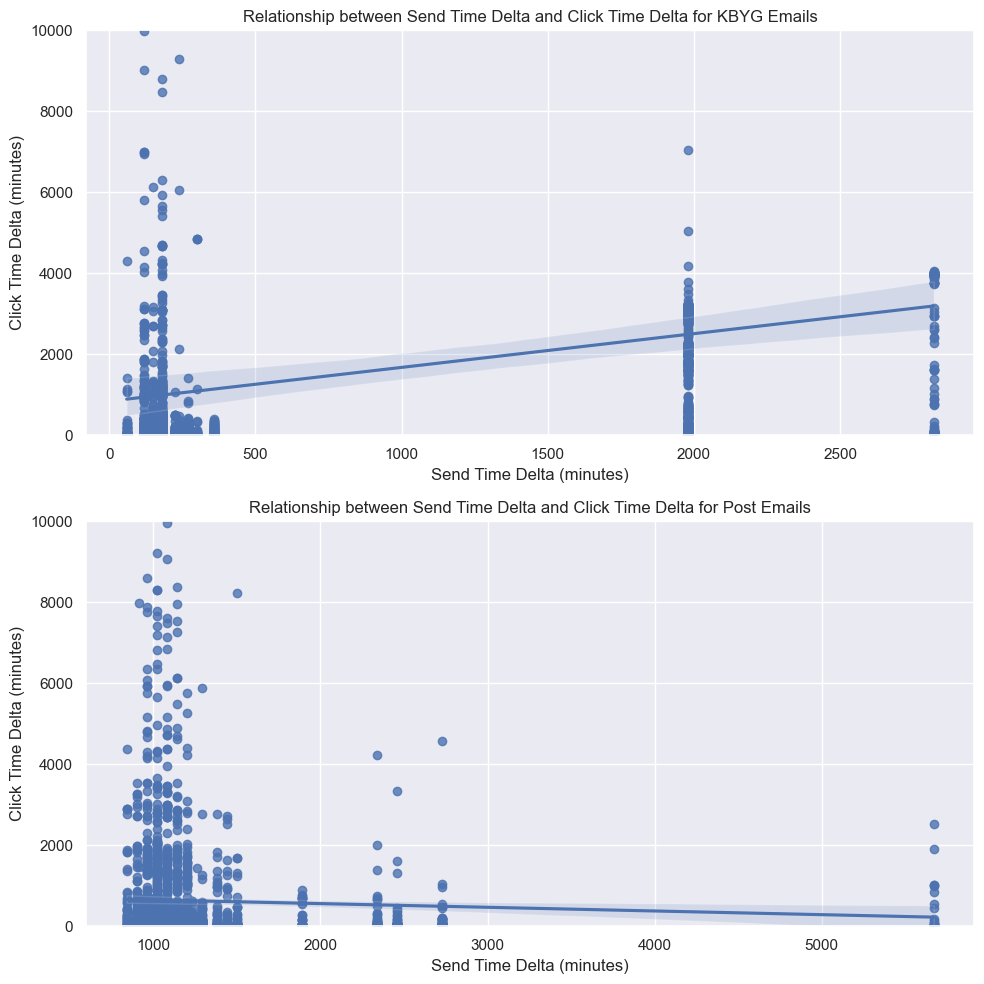

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame based on the 'email_type' column
kbyg_data = email_ctrs_games[email_ctrs_games['email_type'] == 'kbyg']
post_data = email_ctrs_games[email_ctrs_games['email_type'] == 'post']

# Create a figure with two subplots and specify the size of the figure
fig, axs = plt.subplots(2, figsize=(10, 10))

# Create the scatterplot with regression line for 'kbyg' data on the first subplot
sns.regplot(data=kbyg_data, x='send_time_delta_min', y='click_time_delta_min', ax=axs[0])

# Create the scatterplot with regression line for 'post' data on the second subplot
sns.regplot(data=post_data, x='send_time_delta_min', y='click_time_delta_min', ax=axs[1])

# Set plot titles and labels
axs[0].set_title('Relationship between Send Time Delta and Click Time Delta for KBYG Emails')
axs[0].set_xlabel('Send Time Delta (minutes)')
axs[0].set_ylabel('Click Time Delta (minutes)')
axs[0].set_ylim(0,10000)

axs[1].set_title('Relationship between Send Time Delta and Click Time Delta for Post Emails')
axs[1].set_xlabel('Send Time Delta (minutes)')
axs[1].set_ylabel('Click Time Delta (minutes)')
axs[1].set_ylim(0,10000)

# Show the plots
plt.tight_layout()
plt.show()


In [139]:

email_ctrs_summary = email_ctrs_games.groupby(["attendee_email", 'email_type']).agg({"total_sends": "sum", "total_delivered":"sum", "unique_opens":"sum", "unique_clickthroughs":"sum", "send_time_delta_min":"mean"}).reset_index()

,attendee_email,email_type,total_sends,total_delivered,unique_opens,unique_clickthroughs,send_time_delta_min
0,00tony1906@gmail.com,kbyg,1.0,1.0,0,0,180.0
1,01.infirm-pedants@icloud.com,kbyg,1.0,0.0,0,0,180.0
2,01.infirm-pedants@icloud.com,post,1.0,1.0,0,0,960.0
3,0122rene@gmail.com,kbyg,1.0,1.0,0,0,180.0
4,0122rene@gmail.com,post,1.0,1.0,0,0,2460.0
...,...,...,...,...,...,...,...
87548,zzchisox14@gmail.com,kbyg,2.0,2.0,0,0,180.0
87549,zzchisox14@gmail.com,post,1.0,1.0,0,0,960.0
87550,zzhong75@wisc.edu,post,1.0,0.0,0,0,1080.0
87551,zzlusa1991@gmail.com,kbyg,1.0,1.0,0,0,180.0


In [138]:
email_sends_games[email_sends_games['send_time_delta_min'] < 0][["attendee_email", 'email_name',  'Opponent', 'email_type', 'email_send_dt', 'start_ct', 'send_time_delta_min']]



,attendee_email,email_name,Opponent,email_type,email_send_dt,start_ct,send_time_delta_min


In [140]:
2460/60

41.0

In [127]:
import pandas as pd

# Filter the rows
december_games = games[games['start_ct'].dt.year == 2022]
december_games = december_games[december_games['start_ct'].dt.month == 12]

december_games


,season_name,G,event_date,start_ct,Opponent,outcome,overtime,pts,pts_all,W,L,Streak,Notes
10,2022-2023 Chicago Bulls,24,2022-12-07,2022-12-07 19:00:00,Washington Wizards,W,0,115,111,10,14,W 1,None
11,2022-2023 Chicago Bulls,25,2022-12-10,2022-12-10 19:00:00,Dallas Mavericks,W,0,144,115,11,14,W 2,None
12,2022-2023 Chicago Bulls,27,2022-12-14,2022-12-14 18:30:00,New York Knicks,L,1,120,128,11,16,L 2,None
13,2022-2023 Chicago Bulls,28,2022-12-16,2022-12-16 19:00:00,New York Knicks,L,0,91,114,11,17,L 3,None
14,2022-2023 Chicago Bulls,33,2022-12-26,2022-12-26 19:00:00,Houston Rockets,L,0,118,133,14,19,L 1,None
15,2022-2023 Chicago Bulls,34,2022-12-28,2022-12-28 19:00:00,Milwaukee Bucks,W,1,119,113,15,19,W 1,None
16,2022-2023 Chicago Bulls,35,2022-12-30,2022-12-30 19:00:00,Detroit Pistons,W,0,132,118,16,19,W 2,None
17,2022-2023 Chicago Bulls,36,2022-12-31,2022-12-31 18:00:00,Cleveland Cavaliers,L,0,102,103,16,20,L 1,None


In [90]:
import pandas as pd
import pandas as pd

# Sort the email_ctrs dataframe by email_send_dt
email_ctrs_sorted = email_ctrs.sort_values('email_send_dt')

# Merge the email_ctrs_sorted dataframe with the games dataframe
merged_df = pd.merge_asof(email_ctrs_sorted, games, left_on='email_send_dt', right_on='start_ct')

# Assuming the data is stored in a DataFrame called 'merged_df'
merged_df['send_time_delta_min'] = pd.to_numeric((merged_df['start_ct'] - merged_df['email_send_dt']).dt.total_seconds() / 60)

# Update the values based on the email_type column
merged_df.loc[merged_df['email_type'] == 'post', 'send_time_delta_min'] = pd.to_numeric((merged_df['email_send_dt'] - merged_df['start_ct']).dt.total_seconds() / 60)

# Print the merged dataframe
merged_df


,attendee_email,clickthrough_url,clickthrough_dt,email_name,total_clickthroughs,email_send_dt,unique_clickthroughs,clickthrough_link_count,season,email_type,...,Opponent,outcome,overtime,pts,pts_all,W,L,Streak,Notes,send_time_delta_min
0,aaiqbal1@gmail.com,https://www.nba.com/bulls/tickets/fan-email-su...,2022-10-22 16:20:00,2022_1022_CB_Ticketing_01_Pregame_Cleveland_SGB,1,2022-10-22 16:00:00,1,1,2223,kbyg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,davepolito@sbcglobal.net,https://www.nba.com/bulls/tickets/fan-email-su...,2022-10-22 16:42:00,2022_1022_CB_Ticketing_01_Pregame_Cleveland_SGB,1,2022-10-22 16:00:00,1,1,2223,kbyg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,diabetical@hotmail.com,https://www.nba.com/bulls/amex,2022-10-23 10:59:00,2022_1022_CB_Ticketing_01_Pregame_Cleveland_SGB,1,2022-10-22 16:00:00,1,1,2223,kbyg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ecallworld@gmail.com,https://www.nba.com/bulls/healthandsafety,2022-10-22 16:39:00,2022_1022_CB_Ticketing_01_Pregame_Cleveland_SGB,1,2022-10-22 16:00:00,1,1,2223,kbyg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,emsmd@hotmail.com,https://madhouseteamstore.com/,2022-10-22 17:27:00,2022_1022_CB_Ticketing_01_Pregame_Cleveland_SGB,1,2022-10-22 16:00:00,1,1,2223,kbyg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8153,brian.pfaff@motorolasolutions.com,https://bulls.qualtrics.com/jfe/form/SV_5oIJjn...,2024-03-19 12:01:00,2023_CB_Marketing_Surveys_PostGame,1,2024-03-19 12:00:00,1,1,2324,post,...,Portland Trail Blazers,W,0,110.0,107.0,34.0,35.0,W 2,None,1020.0
8154,brian.pfaff@motorolasolutions.com,https://bulls.qualtrics.com/jfe/form/SV_5oIJjn...,2024-03-19 12:01:00,2023_CB_Marketing_Surveys_PostGame,1,2024-03-19 12:00:00,1,1,2324,post,...,Portland Trail Blazers,W,0,110.0,107.0,34.0,35.0,W 2,None,1020.0
8155,asplaton@gmail.com,http://response.bulls.com/subscription-center,2024-03-19 13:39:00,2023_CB_Marketing_Surveys_PostGame,1,2024-03-19 12:00:00,1,1,2324,post,...,Portland Trail Blazers,W,0,110.0,107.0,34.0,35.0,W 2,None,1020.0
8156,walternoco@gmail.com,http://response.bulls.com/subscription-center,2024-03-19 12:32:00,2023_CB_Marketing_Surveys_PostGame,1,2024-03-19 12:00:00,1,1,2324,post,...,Portland Trail Blazers,W,0,110.0,107.0,34.0,35.0,W 2,None,1020.0


In [88]:
import pandas as pd

# Count the number of NaN values in the 'pts' column of merged_df
num_nan_pts = merged_df['pts'].isna().sum()

# Print the result
print("Number of rows with NaN in 'pts' column:", num_nan_pts)


Number of rows with NaN in 'pts' column: 76


In [82]:
email_ctrs['attendee_email'].nunique()

3450

In [85]:
email_ctrs.groupby(['attendee_email', 'email_name']).agg({'clickthrough_url': 'nunique'}).reset_index().sort_values(by = 'clickthrough_url', ascending = False)

,attendee_email,email_name,clickthrough_url
3826,mephgrave@bacardi.com,2022_1207_CB_Ticketing_01_Pregame_Washington_SGB,10
3903,mike@mdgcs.com,2023_0131_CB_Ticketing_01_Pregame_LAClippers_SGB,9
2964,jsantora@irontrax.com,2022_1231_CB_Ticketing_01_Pregame_Cleveland_SGB,9
5219,sschneider@gcssupply.com,2022_1214_CB_Ticketing_01_Pregame_NewYork_SGB,8
3431,lewis.ingall@heitman.com,2024_0120_CB_Digital_KBYG_MEM,7
...,...,...,...
2036,fourbars1d@aol.com,2023_CB_Marketing_Surveys_PostGame,1
2035,fouad.ijabi@gmail.com,2022_1226_CB_Ticketing_01_Pregame_Houston_SGB,1
2034,fotini.anastopoulos@gmail.com,2023_CB_Marketing_Surveys_PostGame,1
2033,fosse@ucco.com,2023_1120_CB_Digital_KBYG_MIA,1


In [30]:

es_counts = email_sends.groupby(["attendee_email","email_send_dt", "email_name"]).size().reset_index(name='counts')


In [38]:
es_counts["counts"].value_counts()

counts
1    222256
2         4
Name: count, dtype: int64

In [43]:
es_counts[es_counts['counts'] > 1]

,attendee_email,email_send_dt,email_name,counts
167073,pandjmasonryrp@outlook.com,2023-03-03 16:00:00,2023_0303_CB_Ticketing_01_Pregame_Phoenix_SGB,2
197072,smobrien914@gmail.com,2023-04-02 12:00:00,2023_0402_CB_Ticketing_01_Pregame_Memphis_SGB,2
197074,smobrien914@gmail.com,2023-04-09 10:00:00,2023_0409_CB_Ticketing_01_Pregame_Detroit_SGB,2
200028,steve.baird@bairdwarner.com,2022-11-21 16:00:00,2022_1121_CB_Ticketing_01_Pregame_Boston_SGB,2
